# Data Mining - Assignment 2

In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
FILE = '/home/walter/Desktop/DMT_data/training_set_VU_DM_2014.csv'

In [3]:
df = dd.read_csv(FILE)

In [12]:
df.dtypes

srch_id                          int64
date_time                       object
site_id                          int64
visitor_location_country_id      int64
visitor_hist_starrating        float64
visitor_hist_adr_usd           float64
prop_country_id                  int64
prop_id                          int64
prop_starrating                  int64
prop_review_score              float64
prop_brand_bool                  int64
prop_location_score1           float64
prop_location_score2           float64
prop_log_historical_price      float64
position                         int64
price_usd                      float64
promotion_flag                   int64
srch_destination_id              int64
srch_length_of_stay              int64
srch_booking_window              int64
srch_adults_count                int64
srch_children_count              int64
srch_room_count                  int64
srch_saturday_night_bool         int64
srch_query_affinity_score      float64
orig_destination_distance

In [13]:
length = len(df)
print(length)

4958347


In [4]:
uni_search = df['srch_id'].unique().compute()
uni_v_loc = df['visitor_location_country_id'].unique().compute()
uni_site = df['site_id'].unique().compute()
uni_prop = df['prop_id'].unique().compute()
len(uni_search)
len(uni_prop)


129113

In [7]:
# List of all randomly ranked searches
df['srch_id'].where(df['random_bool']==1).unique().compute()

0             1.0
1             4.0
2             NaN
3            11.0
4            12.0
5            17.0
6            31.0
7            40.0
8            43.0
9            56.0
10           61.0
11           63.0
12           71.0
13           75.0
14           81.0
15           83.0
16           90.0
17           96.0
18          101.0
19          103.0
20          104.0
21          107.0
22          108.0
23          110.0
24          117.0
25          119.0
26          126.0
27          127.0
28          133.0
29          134.0
           ...   
60722    332661.0
60723    332666.0
60724    332667.0
60725    332668.0
60726    332682.0
60727    332685.0
60728    332686.0
60729    332689.0
60730    332690.0
60731    332691.0
60732    332693.0
60733    332701.0
60734    332706.0
60735    332707.0
60736    332710.0
60737    332713.0
60738    332715.0
60739    332717.0
60740    332718.0
60741    332729.0
60742    332730.0
60743    332732.0
60744    332742.0
60745    332747.0
60746    3

In [16]:
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [21]:
# count missing values
nulls = df.isnull().sum(axis=0).compute()

In [29]:
sparsity = nulls.sort_values()/length

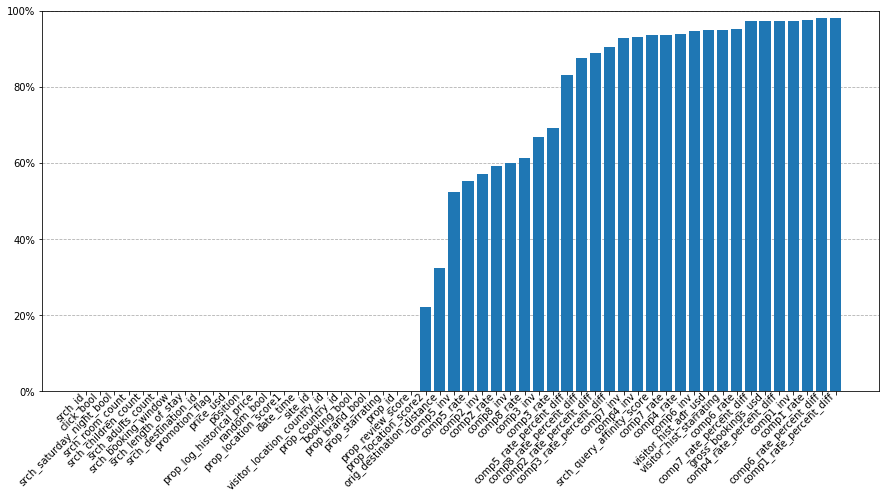

In [74]:
fig, ax = plt.subplots(figsize=[15, 7])
ax.bar(sparsity.index, sparsity.values)
ax.set_axisbelow(True)
ax.grid(axis='y', ls='--')
ax.set_xticklabels(sparsity.index, rotation=45, fontdict={'ha': 'right', 'va': 'baseline'})
ax.set_yticklabels(['{:.0%}'.format(i) for i in np.linspace(0, 1, 6)])
ax.set_ylim(0, 1)
plt.show()

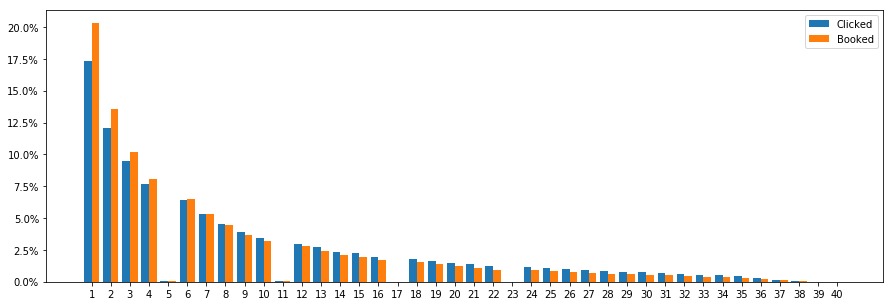

In [17]:
# plot hist of positions of clicked hotels 
pos_clicked = df['position'].where(df['click_bool']==1).compute()
pos_booked = df['position'].where(df['booking_bool']==1).compute()
pos_clicked = pos_clicked.value_counts(normalize=True)
pos_clicked.index = pos_clicked.index.map(int)
pos_booked = pos_booked.value_counts(normalize=True)
pos_booked.index = pos_booked.index.map(int)

fig, ax = plt.subplots(figsize=[15,5])
x = np.arange(1, 41)
ax.bar(x-0.2, pos_clicked[x], width=0.4, label='Clicked')
ax.bar(x+0.2, pos_booked[x], width=0.4, label='Booked')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()

/home/walter/.local/lib/python3.5/site-packages/pandas/core/series.py:696: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


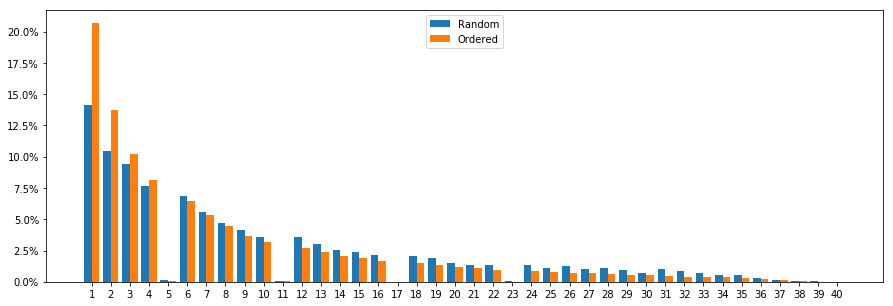

In [19]:
# plot hist of positions of booked hotels where ranking was random vs. ordered
pos_random = df['position'].where(df['booking_bool']==1).where(df['random_bool']==1).compute()
pos_ordered = df['position'].where(df['booking_bool']==1).where(df['random_bool']==0).compute()
pos_random = pos_random.value_counts(normalize=True)
pos_random.index = pos_random.index.map(int)
pos_ordered = pos_ordered.value_counts(normalize=True)
pos_ordered.index = pos_ordered.index.map(int)

fig, ax = plt.subplots(figsize=[15,5])
x = np.arange(1, 41)
ax.bar(x-0.2, pos_random[x], width=0.4, label='Random')
ax.bar(x+0.2, pos_ordered[x], width=0.4, label='Ordered')
ax.set_xticks(x)
ax.set_yticklabels(['{:.1%}'.format(i) for i in np.linspace(0, 0.2, 9)])

plt.legend()
plt.show()

In [7]:
clicked_properties = df['prop_id'].where(df['click_bool']==1).compute()
clicked_properties = clicked_properties.value_counts()
booking_properties = df['prop_id'].where(df['booking_bool']==1).compute()
booking_properties = booking_properties.value_counts()
print(clicked_properties)
print(booking_properties)

116942.0    245
77089.0     191
22578.0     182
137997.0    174
104517.0    174
37818.0     160
53494.0     156
70177.0     138
38419.0     131
23268.0     125
31442.0     123
61529.0     120
1230.0      119
14536.0     118
134154.0    116
40279.0     115
124342.0    115
98803.0     114
21018.0     113
60846.0     112
53547.0     112
37124.0     110
62726.0     109
44213.0     109
68420.0     107
34151.0     105
79740.0     105
132210.0    103
13674.0     103
14082.0     102
           ... 
64192.0       1
64199.0       1
64203.0       1
64205.0       1
64207.0       1
64209.0       1
64218.0       1
64219.0       1
64220.0       1
64221.0       1
64233.0       1
64236.0       1
64244.0       1
64250.0       1
64271.0       1
64273.0       1
64275.0       1
64283.0       1
64289.0       1
64317.0       1
64319.0       1
64320.0       1
64325.0       1
64337.0       1
64339.0       1
64361.0       1
64362.0       1
64367.0       1
64371.0       1
2.0           1
Name: prop_id, Length: 5

In [10]:
h, bins = df.histogram(clicked_properties, bins=100, range=[0, 250])

AttributeError: 'DataFrame' object has no attribute 'histogram'